In [979]:
import numpy as np
import time
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(0)

In [980]:
no_sample_feature = 2 ##q.1
feature_dim = 3    ##q.1
feature_vector = np.array([2,3,4,1,5])
wt_vector = np.array([0.09,0.25,0.35,0.14,0.22])
w0 = 3.244
noise_feature_dimiance = 1.21
y_predict = np.array([37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23])
target_value = np.array([34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24])
arr = np.array([1,2,3,4,5])  ##q.7

In [981]:
##q.1
def generate_data_matrix(no_of_samples,feature_dimension):
    return np.random.randn(no_of_samples,feature_dimension) ##generating random sample

In [982]:
generate_data_matrix(no_sample_feature,feature_dim)

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [983]:
##q.2
def target_vector(X, wt_vector, w0, noise_feature_dimiance):
    y_predict = np.sum(X*wt_vector,axis=0) ## y = w1x1 + w2x2 +.... 
    y_predict_with_bias = y_predict + w0   ## y = w0 + w1x1 + w2x2 +....
    error_term = np.random.normal(0,noise_feature_dimiance,y_predict.shape)  ## y = w0 + w1x1 + w2x2 +.....+ epsilon
    return y_predict_with_bias + error_term
    

In [984]:
target_vector(feature_vector,wt_vector,w0,noise_feature_dimiance)

7.963606985205963

In [985]:
##q.3
def linear_regression_estimate(x,w): ## y = dot product of x and w
    return np.dot(x,w)

In [986]:
linear_regression_estimate(feature_vector,wt_vector)

3.5700000000000003

In [987]:
##q.4
def mean_square_error(y,t):  ##assumed same dim for y and t
    error_diff = np.subtract(t,y)     ## (t-y)
    error_diff_square = error_diff*error_diff ## (t-y)^2
    return np.mean(error_diff_square)   ##mean of (t-y)^2

In [988]:
mean_square_error(y_predict,target_value)

5.916666666666667

In [989]:
##q.5
def weight_estimation(X,t,lmbda):
    w = (np.linalg.pinv(lmbda*np.eye(X.shape[1]) + np.transpose(X) @ X)) @ (np.transpose(X)) @ t   ## w = ((lmbda*I + X^T * X)^-1)*X^T*t
    y = X @ w  ## y = dot prodcut of X and w
    mse = mean_square_error(y , t)  ##used q.4 for the function
    return w, mse , y

In [990]:
X = np.array([[1,2],[3,5]])
t = np.array([1,3])
lam = 1.2
weight_estimation(X,t,lam)


(array([0.264013  , 0.41429732]),
 0.01360071956451334,
 array([1.09260764, 2.86352559]))

In [991]:
w = np.array([0.264013  , 0.41429732])

In [992]:
##q.6
def gradient_of_mse(X,t,w):
    y_predict = X @ w  ## dot product of X and w
    return (-1) * 2 * np.transpose(X) @ (t - y_predict) / X.shape[0]    ## -2*X^T*(t-y)

In [993]:
gradient_of_mse(X,t,w)

array([-0.31681556, -0.49715672])

In [994]:
##q.7
def l2_norm(w):  ## 'w' is the vector(passed as numpy array) for which l2 norm to be calculated.Here, it is assumed that bias value is not element of the w vector
    return (np.sum(w*w,axis=0))**0.5  ## (summation of square of each element of w)^0.5


In [995]:
l2_norm(arr)

7.416198487095663

In [996]:
##q.8
def gradient_of_l2_norm(w):
    return 2 * w    ## gradient = 2w

In [997]:
gradient_of_l2_norm(w)

array([0.528026  , 0.82859464])

In [998]:
##q.9
def l1_norm(w):  ## 'w' is the vector(passed as numpy array) for which l1 norm to be calculated.Here, it is assumed that bias value is not element of the w vector
    return np.sum(w,axis=0)   ## (summation of each element of w)

In [999]:
l1_norm(arr)

15

In [1000]:
##q.10
def gradient_of_l1_norm(w):
    return np.sign(w)  ## sign of each element of the w

In [1001]:
gradient_of_l1_norm(w)

array([1., 1.])

In [1002]:
##q.11
def single_update_weight(X,t,w,eta,lambda2,lambda1):  ## using gradient descent i.e. w(new) = w(old) - eta*(gradient of l wrt w)
    y_predict = X @ w   ## dot product of X and w
    mse_gradient = 2 * np.transpose(X) @ (y_predict - t)   
    l1_term_gradient = lambda1* np.sign(w)
    l2_term_gradient = 2 * lambda2 * w
    total_gradient_term = mse_gradient + l1_term_gradient + l2_term_gradient  ## summation of three gradient term of loss, ridge and l1 regularization
    total_gradient_term[0] = mse_gradient[0]
    w_new = w - eta * total_gradient_term  ## w(new) = w(old) - gradient of loss function wrt w
    mse = np.mean(((X @ w_new) - t) ** 2)
    return w_new, mse

In [1003]:
single_update_weight(X,t,w,0.12,2,3)

(array([ 0.34004873, -0.02524778]), 2.470180579320792)

In [1004]:
##q.12
def wt_linear_reg_grad_descnt(X, t, lambda2=0, lambda1=0, eta=0.001, max_iter=5000, min_change_NRMSE=0.0001):
    X_row = X.shape[0]
    X_colm = X.shape[1]
    w = np.zeros(X_colm)  ## initiated w with same dim as column of X
    nrmse = float('inf')
    for i in range(max_iter):
        y_predict = X @ w
        mse = np.mean((y_predict-t)**2)
        mse_gradient = 2* np.transpose(X) @ (y_predict-t) / X_row
        l2_gradient = 2*lambda2*w
        l1_gradient = np.sign(w)
        gradient = mse_gradient + l2_gradient + l1_gradient
        w = w - eta * gradient
        new_nrmse = np.sqrt(mse / np.var(t))   ## square root of mean square error divided by vairance
        if abs(nrmse - new_nrmse) < min_change_NRMSE:  ## checking if the diff is between tolerence level
            break
        nrmse = new_nrmse
    return w, nrmse

In [1005]:
wt_linear_reg_grad_descnt(X,t,1.2,1.7,0.00001,10000,0.000001)

(array([0.1953126 , 0.39154281]), 0.3230603975940097)

In [1006]:
##q.13
def data_generation(no_of_samples, feature_dim):
    X_train = generate_data_matrix(no_of_samples, feature_dim)
    t_train = X_train.dot(np.random.randn(feature_dim)) + np.random.randn(no_of_samples)
    X_val = generate_data_matrix(no_of_samples, feature_dim)
    t_val = X_val.dot(np.random.randn(feature_dim)) + np.random.randn(no_of_samples)
    return X_train, X_val, t_train, t_val

def pseudo_inverse(X_train, t_train, X_val, t_val, lamda = 0, noise_variance = 0, w0 = 0):
    first_part = np.linalg.pinv(np.dot(np.transpose(X_train), X_train)+ lamda * np.eye(X_train.shape[1]) + noise_variance * np.eye(X_train.shape[1]))
    sec_part = np.dot(first_part, np.transpose(X_train))
    w = np.dot(sec_part, (t_train-w0))
    t_train_pred = X_train.dot(w)
    t_val_pred = X_val.dot(w)
    train_nrmse = np.sqrt(np.mean((t_train - t_train_pred)**2)) / np.std(t_train)
    val_nrmse = np.sqrt(np.mean((t_val - t_val_pred)**2)) / np.std(t_val)
    return train_nrmse, val_nrmse

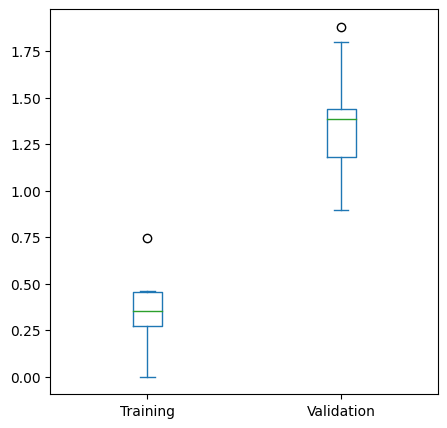

In [1007]:
np.random.seed(1)
no_of_samples_list = [3*x for x in range(1,10)]
train_nrmse_list = []
val_nrmse_list = []
feature_dim = 5
for no_of_samples in no_of_samples_list:
    X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))

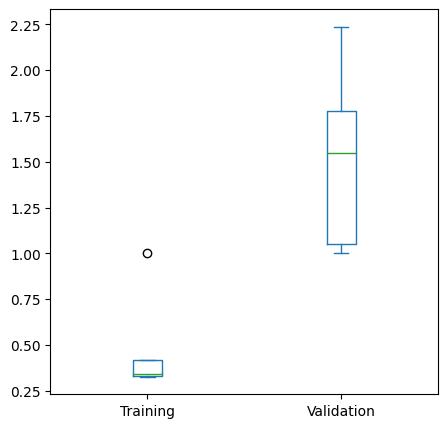

In [1008]:
np.random.seed(2)
no_of_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
feature_dim_list = [3*x for x in range(5)]
for feature_dim in feature_dim_list:
    X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))

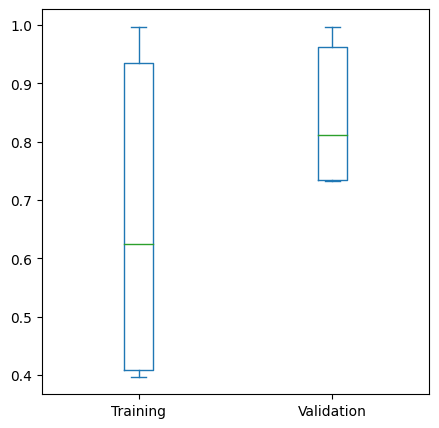

In [1009]:
np.random.seed(3)
no_of_samples = 100
feature_dim = 5
train_nrmse_list = []
val_nrmse_list = []
noise_variance_list = [3**x for x in range(10)]
X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
for noise_variance in noise_variance_list:
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val, noise_variance = noise_variance)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))

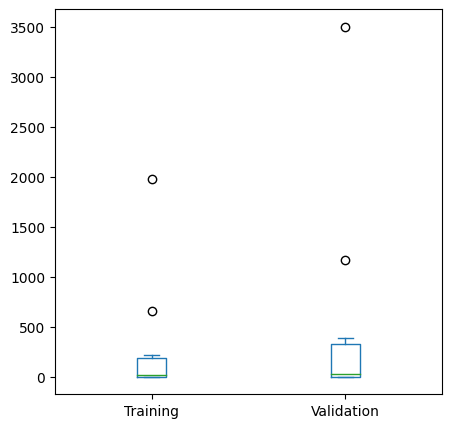

In [1010]:
np.random.seed(4)
no_of_samples = 100
feature_dim = 5
train_nrmse_list = []
val_nrmse_list = []
W0_list = [3**x for x in range(10)]
X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)

for w0 in W0_list:    
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val, w0 = w0)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))

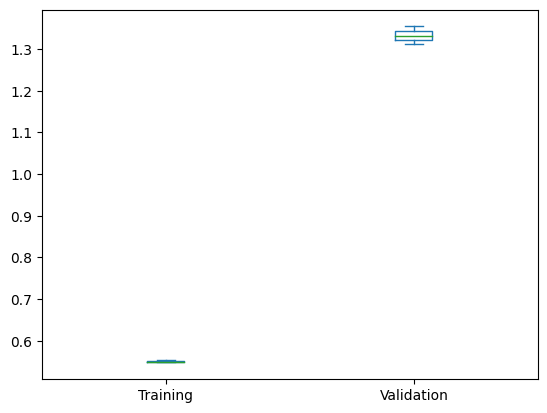

In [1011]:
np.random.seed(5)
no_of_samples = 100
feature_dim = 5
train_nrmse_list = []
val_nrmse_list = []
lambda_list = [x for x in range(10)]
X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
for lamda in lambda_list:
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val, lamda = lamda)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box')

Text(0.5, 1.0, 'No of feature dim')

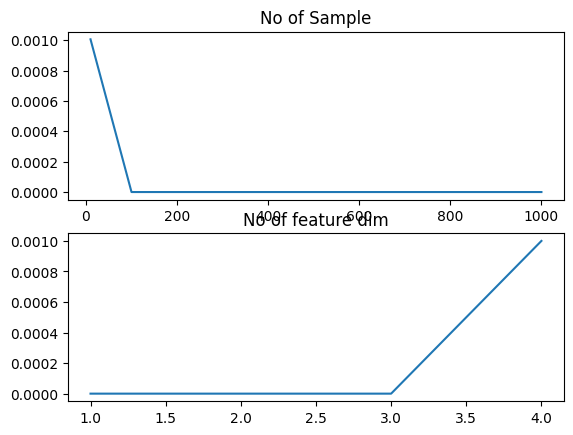

In [1012]:
np.random.seed(6)
samples = 1000
no_of_samples_list = [10**x for x in range(1,4)]
feature_dim = 5
no_of_feature_dim_list = [x for x in range(1,5)]
no_of_samples1 = []
time1 = []
no_of_feature_dim = []
time2 = []


for no_of_samples in no_of_samples_list:
    st = time.time()
    X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val)
    et = time.time()
    no_of_samples1.append(no_of_samples)
    time1.append(et-st)

for feature_dim in no_of_feature_dim_list:
    st = time.time()
    X_train, X_val, t_train, t_val = data_generation(samples, feature_dim)
    train_nrmse,val_nrmse = pseudo_inverse(X_train, t_train, X_val, t_val)
    et = time.time()
    no_of_feature_dim.append(feature_dim)
    time2.append(et-st)
    
fig, axs = plt.subplots(2)    
axs[0].plot(no_of_samples1, time1)
axs[0].set_title('No of Sample')
axs[1].plot(no_of_feature_dim, time2)
axs[1].set_title('No of feature dim')

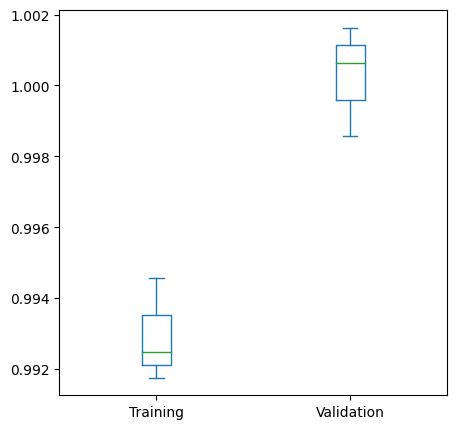

In [1013]:
np.random.seed(7)
no_of_samples = 1000
feature_dim = 5
train_nrmse_list = []
val_nrmse_list = []
max_iterations_list = [10**x for x in range(1, 4)]
X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
for max_iteration in max_iterations_list:
    weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = max_iteration, min_change_NRMSE = 0.00001)
    y_val = linear_regression_estimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))

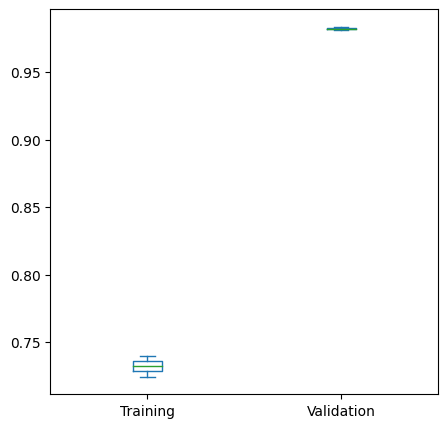

In [1014]:
np.random.seed(8)
no_of_samples = 1000
feature_dim = 5
train_nrmse_list = []
val_nrmse_list = []
eta_list = [0.1**x for x in range(1, 3)]
X_train, X_val, t_train, t_val = data_generation(no_of_samples, feature_dim)
for eta in eta_list:
    weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = eta, max_iter = 1000, min_change_NRMSE = 0.00001)
    y_val = linear_regression_estimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

data = pd.DataFrame({"Training": train_nrmse_list, "Validation": val_nrmse_list})
ax = data[['Training', 'Validation']].plot(kind='box',figsize=(5,5))
plt.show()

In [1015]:
no_of_samples = [10**x for x in range(1, 4)]
train_nrmse_list = []
val_nrmse_list = []
feature_dim = [5*x for x in range(1, 10)]

for sample in no_of_samples:
    for va in feature_dim:
        X_train, X_val, t_train, t_val = data_generation(sample, va)
        st = time.time()
        weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
        y_val = linear_regression_estimate(X_val, weights)
        val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
        ed = time.time()
        print('no_of_samples = ', sample, 'feature_dimiables = ', va, 'time = ', ed-st)

no_of_samples =  10 feature_dimiables =  5 time =  0.03425002098083496
no_of_samples =  10 feature_dimiables =  10 time =  0.02744150161743164
no_of_samples =  10 feature_dimiables =  15 time =  0.018685340881347656
no_of_samples =  10 feature_dimiables =  20 time =  0.03210949897766113
no_of_samples =  10 feature_dimiables =  25 time =  0.03275609016418457
no_of_samples =  10 feature_dimiables =  30 time =  0.033045291900634766
no_of_samples =  10 feature_dimiables =  35 time =  0.017246246337890625
no_of_samples =  10 feature_dimiables =  40 time =  0.0323944091796875
no_of_samples =  10 feature_dimiables =  45 time =  0.03376507759094238
no_of_samples =  100 feature_dimiables =  5 time =  0.0313875675201416
no_of_samples =  100 feature_dimiables =  10 time =  0.025408267974853516
no_of_samples =  100 feature_dimiables =  15 time =  0.026897430419921875
no_of_samples =  100 feature_dimiables =  20 time =  0.03276824951171875
no_of_samples =  100 feature_dimiables =  25 time =  0.0331

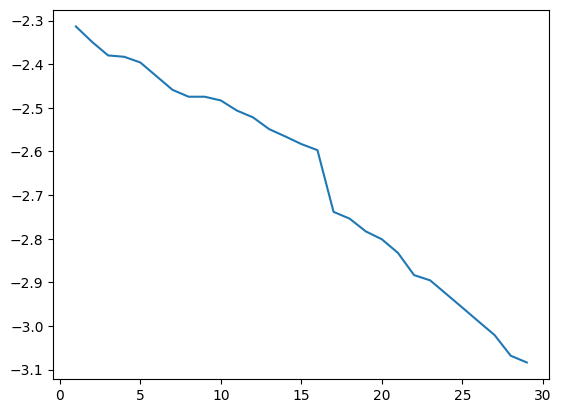

In [1016]:
np.random.seed(9)
no_of_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
no_of_feature_dim = []
time1 = []
feature_dim = [x for x in range(1, 30)]

for va in feature_dim:
    X_train, X_val, t_train, t_val = data_generation(sample, va)
    st = time.time()
    weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.00001)
    y_val = linear_regression_estimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    ed = time.time()
    no_of_feature_dim.append(va)
    time1.append(et-st)
    
plt.plot(no_of_feature_dim,time1)
plt.show()

In [1017]:
np.random.seed(10)
no_of_samples = 100
train_nrmse_list = []
val_nrmse_list = []
lambda2_list = [0.5*x for x in range(1, 4)]


for lambda2 in lambda2_list:
    X_train, X_val, t_train, t_val = data_generation(sample, va)
    weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = lambda2, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.00001)
    y_val = linear_regression_estimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    #ed = time.time()
    print('lambda2 = ', lambd, 'weights = ', weights)

lambda2 =  4.5 weights =  [-8.18766649e-02 -1.15033219e-01  1.09007099e+00  1.28289291e-02
  1.93158325e-01 -5.40373629e-03 -3.55761489e-03 -1.69182683e+00
  6.60213209e-01 -1.01500914e-01 -8.23684215e-01  4.31551764e-03
 -4.60245511e-03  8.87276337e-01  1.57644624e-01  5.70615515e-01
 -8.07692628e-03 -1.81498919e-04  1.60077281e-03 -4.53161924e-01
 -1.56842528e-01  3.57963137e-01 -9.23895711e-04 -2.18804486e-01
  8.24725202e-03  1.09434210e-02  4.69115201e-01  6.40318208e-01
 -1.07407891e-01]
lambda2 =  4.5 weights =  [-7.27353665e-01 -1.44193734e-01 -1.98081446e-01  3.53099292e-03
 -3.74856614e-03 -3.71147393e-03 -1.70127761e-01 -1.32982030e-01
  8.37915411e-01 -4.02552784e-01 -1.09133668e-02  2.09080905e-01
 -1.51769132e-02 -4.77840256e-01 -4.71783191e-03  1.27683659e-02
  1.66649188e-01  3.29227934e-01 -3.33136635e-01  1.11785254e-02
 -1.54711741e-03 -8.01430879e-02  1.40996262e-04  2.96542164e-03
  2.88988302e-03  5.88376508e-01  5.80230343e-01 -1.30767811e-02
 -2.27703998e-01]
la

In [1018]:
np.random.seed(11)
no_of_samples = 100
train_nrmse_list = []
val_nrmse_list = []
lambda1_list = [0.5*x for x in range(1, 4)]


for lambda1 in lambda1_list:
    X_train, X_val, t_train, t_val = data_generation(sample, va)
    weights, train_nrmse = wt_linear_reg_grad_descnt(X_train, t_train, lambda2 = 0, lambda1 = lambda1, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.00001)
    y_val = linear_regression_estimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    #ed = time.time()
    print('lambda1 = ', lambd, 'weights = ', weights)

lambda1 =  4.5 weights =  [ 6.53565455e-04  3.41800311e-01 -3.42663692e-03 -7.06476902e-03
 -6.18438686e-01  4.81856584e-03 -7.03960106e-01 -1.33233974e+00
 -6.71565078e-03 -5.63048116e-01 -4.86294778e-01 -2.00723037e+00
 -6.04085716e-01 -3.23509288e-01  2.64083559e-03  8.16179441e-03
 -1.10616247e-01  1.18770871e+00  1.61637691e-02 -8.71464486e-01
  7.17128800e-03  4.69024438e-01  5.83084207e-03 -7.31173582e-01
 -3.14756460e-01  1.54536765e-02  3.91679596e-01  1.10380990e+00
 -9.15099175e-01]
lambda1 =  4.5 weights =  [ 2.06911263e-01  1.68051855e-01 -4.46789916e-03 -1.27442380e-01
  1.72738757e+00 -8.10516413e-02 -7.12558657e-04  6.23614741e-03
  2.00055027e+00  1.06256306e+00 -6.88422454e-03 -2.72049202e-01
  8.52093530e-01  6.36534924e-03 -6.37760764e-01 -1.57860672e+00
 -2.46598783e-02 -1.39921904e+00  8.06813555e-03  2.76978328e-03
  2.48037007e-04  1.09199120e+00  3.33146749e-03  5.68249904e-04
 -1.37169450e-01 -6.57236952e-01  1.50105103e-02  7.03187508e-02
 -5.28541705e-01]
la

Question No 14:

The assignment was very unique of it's kind. I have learned almost all aspects of the linear regression. Some highlights that I have learned through this assignment:
 1. Implemented the iteration method to determine weight value
 2. Learned a lot things about numpy and the power of this python library.
 3. Now, I feel very confident about the linear regression
 4. Learned more about implementing two regularization
 5. I have leared how to differentiate wrt vectors.

Question No 15:
    Some of the source that I have used to complete assignement:
        1. https://numpy.org/doc/stable/reference/
        2. https://chat.openai.com/
        3. https://www.youtube.com/watch?v=y4t8MuKqKt8&t=320s&ab_channel=MurtazaZohair
        4. https://www.youtube.com/watch?v=iWxY7VdcSH8&ab_channel=BenLambert
        5. I have extensively used stackoverflow in order to remove bugs
        
    I have taken a lot of help in q.13 from assignement of my friend whose roll no:190020080, I have disscussed it to him, I have also taken directly some part of code from his assignment, but Now, I know all the code that I have written.